# 1. Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import skimage
from skimage.filters.thresholding import threshold_li,threshold_local,threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, remove_small_objects, ball
from skimage.morphology import disk
from scipy import ndimage as ndi
import sys,os, glob

#import skimage.filters.median

#import skimage.segmentation as seg
#import skimage.filters as filters
#import skimage.draw as draw
#import skimage.color as color

#from skimage.filters.thresholding import _cross_entropy
#from skimage.morphology import black_tophat, skeletonize, convex_hull_image


#pip install nd2reader_required for nd2 file reading
from nd2reader import ND2Reader

import pandas as pd

c:\programdata\anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


# 2. Define common parameters for measurement loading here:

In [2]:
# The labeled histone mark in the excel

h2ax_key = 'Pol2S5'


# the actual histone mark analyzed  (to correct the mis-labeling in the raw measurements)
actual_h2ax_key = 'Pol2S5'


## Control exps

### Batch 1

In [3]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps_p2\220623IF_220620exp_bridges_6h\220623IF_H3K27ac_2\analysis_subset_controlled'

exp1_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

exp1_df['exp_annotation']='220623IF_220620exp'

In [4]:
# load experiment exp2

#analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps\2203087IF_220216exp_noco45h_Mdc1_H3T3_H3S10\cov2_H3S10\analysis_subset_controlled'

#exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

### Batch 2

In [5]:
# load experiment exp1

analysis_fd = r'D:\Analyzed_CellBio\Stam\Revision_exps_p2\220728IF_220621exp_bridges_6h\220728IF_RNAPolS5\analysis_subset_controlled'

exp2_df = pd.read_excel(analysis_fd + os.sep + 'measurement_for_all_fov_background_subtracted_2_100_crop.xlsx')

exp2_df['exp_annotation']='220728IF_220621exp'

In [6]:
#exp2_df

In [7]:
#ctrl_combined_df = pd.concat([exp1_df,exp2_df])
ctrl_combined_df =pd.concat([exp1_df,exp2_df])

len(ctrl_combined_df)


#measurement_for_all_fov_df = ctrl_combined_df

773

In [8]:
#ctrl_combined_df.columns

In [9]:
len(ctrl_combined_df)


773

In [10]:
size_th=300

ctrl_combined_df = (ctrl_combined_df[ctrl_combined_df['area_incorporated_chr']>=size_th])

len(ctrl_combined_df)


310

# 3. Post-hoc analysis examples

In [11]:
#len(measurement_for_all_fov_df)


analysis_save_path = r'D:\Analyzed_CellBio\Stam\Revision_exps_p2\T2p1_Pol2_analysis'

if not os.path.exists(analysis_save_path):
    os.mkdir(analysis_save_path)

analysis_savename = 'mdc-568_baf-488_pol2_analyzed.xlsx'

In [24]:
# The labeled histone mark in the excel

h2ax_key = 'BAF'


# the actual histone mark analyzed  (to correct the mis-labeling in the raw measurements)
actual_h2ax_key = 'BAF'

In [25]:
# Process each datafram

out_df_dict = {}
exp_name_list = ["T2p1"]

for _df_index, _df in enumerate([ctrl_combined_df]):
    print(f'analyzing experiment group {_df_index}.')
    
    # remove the bad cell that has no Pol2 signal
    analysis_df = _df[_df['ave_intensity_control_chr_Pol2S5']>0].copy()
    print (f'-- There are {len(analysis_df)} data-points after filtering.')

    # for total incorporated chr
    analysis_df['normalized_inc_Pol2S5']=analysis_df['ave_intensity_incorporated_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
    print(analysis_df['normalized_inc_Pol2S5'].mean())

    # for subset control
    analysis_df['normalized_subset_control_Pol2S5']=analysis_df['ave_intensity_subset_control_chr_Pol2S5']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Pol2S5']
    print(analysis_df['normalized_subset_control_Pol2S5'].mean())

    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df[f'normalized_inc_{actual_h2ax_key}'] = analysis_df[f'ave_intensity_incorporated_chr_{actual_h2ax_key}']/analysis_df[f'ave_intensity_nucleo-excluded_control_chr_{actual_h2ax_key}']
    print(analysis_df[f'normalized_inc_{actual_h2ax_key}'].mean())

    # for subset control
    analysis_df[f'normalized_subset_control_{actual_h2ax_key}']=analysis_df[f'ave_intensity_subset_control_chr_{actual_h2ax_key}']/analysis_df[f'ave_intensity_nucleo-excluded_control_chr_{actual_h2ax_key}']
    print(analysis_df[f'normalized_subset_control_{actual_h2ax_key}'].mean())

    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df['normalized_inc_Mdc1'] = analysis_df['ave_intensity_incorporated_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
    print(analysis_df['normalized_inc_Mdc1'].mean())

    # for subset control
    analysis_df['normalized_subset_control_Mdc1']=analysis_df['ave_intensity_subset_control_chr_Mdc1']/analysis_df['ave_intensity_nucleo-excluded_control_chr_Mdc1']
    print(analysis_df['normalized_subset_control_Mdc1'].mean())

    # get the h2ax-positive area vs h2ax-less (positive) area for the same cell
    analysis_df['normalized_inc_dna'] = analysis_df['ave_intensity_incorporated_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
    print(analysis_df['normalized_inc_dna'].mean())

    # for subset control
    analysis_df['normalized_subset_control_dna']=analysis_df['ave_intensity_subset_control_chr_dna']/analysis_df['ave_intensity_nucleo-excluded_control_chr_dna']
    print(analysis_df['normalized_subset_control_dna'].mean())
    
        # reorder some column
    col = analysis_df.pop("exp_annotation")
    analysis_df.insert(0, "exp_annotation", col)
    
    out_df_key = exp_name_list[_df_index]
    out_df_dict[out_df_key]=analysis_df
    

analyzing experiment group 0.
-- There are 310 data-points after filtering.
0.7578161797819364
1.0073660607192338
1.2432660164706406
1.0132467801910756
4.090842639581652
0.9739278348267802
0.8918020643390288
1.0060317849130136


In [26]:
#analysis_savename = 'rpe1_h3k27_pol2_analyzed.xlsx'


for _exp_key, _exp_df in out_df_dict.items():
    exp_analysis_savename = _exp_key+'_'+analysis_savename
    _exp_df.to_excel(os.path.join(analysis_save_path,exp_analysis_savename), index=False)

## Size filtering

In [27]:
size_th =300
analysis_filtered_savename = analysis_savename.split('.xlsx')[0]+ f'_size{size_th}' + '.xlsx'


for _exp_key, _exp_df in out_df_dict.items():
    
    _exp_df= _exp_df[_exp_df['area_incorporated_chr']>size_th].copy()
    print (f'-- There are {len(_exp_df)} data-points after filtering.')
    exp_analysis_savename = _exp_key+'_'+analysis_filtered_savename
    _exp_df.to_excel(os.path.join(analysis_save_path,exp_analysis_savename), index=False)
    


-- There are 309 data-points after filtering.


## Position filtering

In [28]:
def filter_cell_by_coord (xyz_coord_str, bound1=2048, bound2=0, dist_tp_bound = 600):
    
    xy_coord_str = xyz_coord_str.split('],')[0].split('[[')[-1]
    # note here xy is symetric; otherwise need to check which is x and which is y
    x=int(xy_coord_str.split(',')[0])
    y=int(xy_coord_str.split(',')[1])
    
    if abs(x-bound1)>=dist_tp_bound and abs(y-bound1)>=dist_tp_bound:
        if abs(x-bound2)>=dist_tp_bound and abs(y-bound2)>=dist_tp_bound:
            result= 1
        else:
            result= 0
    else:
        result= 0

    return result
        
size_th=300    
analysis_filtered_savename = analysis_savename.split('.xlsx')[0]+ f'_size{size_th}_pos_filtered' + '.xlsx'


for _exp_key, _exp_df in out_df_dict.items():    
    
    # size filtering
    _exp_df= _exp_df[_exp_df['area_incorporated_chr']>size_th].copy()
    print (f'-- There are {len(_exp_df)} data-points after size filtering.')
    # postion filtering
    _exp_df['pos_kept']=_exp_df['cell_xyz_coord'].map(lambda x: filter_cell_by_coord(x))
    _exp_df=_exp_df[_exp_df['pos_kept']==1].copy()
    print (f'-- There are {len(_exp_df)} data-points after position filtering.')
    exp_analysis_savename = _exp_key+'_'+analysis_filtered_savename
    _exp_df.to_excel(os.path.join(analysis_save_path,exp_analysis_savename), index=False)


-- There are 309 data-points after size filtering.
-- There are 309 data-points after position filtering.


MW comparision: 4.2446745661173425e-17


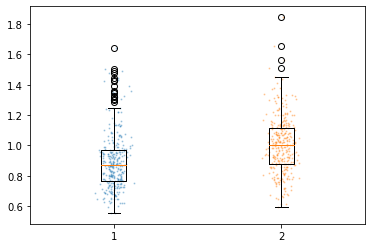

In [29]:
# for dna

# 
g1 = out_df_dict['T2p1']['normalized_inc_dna']
g2 = out_df_dict['T2p1']['normalized_subset_control_dna']
#g3 = out_df_dict['HDACi']['normalized_inc_dna']
#g4 = out_df_dict['HDACi']['normalized_subset_control_dna']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)


boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 2.8976218928527527e-103


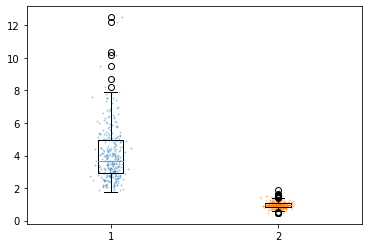

In [30]:
# for mdc1

g1 = out_df_dict['T2p1']['normalized_inc_Mdc1']
g2 = out_df_dict['T2p1']['normalized_subset_control_Mdc1']
#g3 = out_df_dict['HDACi']['normalized_inc_Mdc1']
#g4 = out_df_dict['HDACi']['normalized_subset_control_Mdc1']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)

boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.9851311628643263e-43


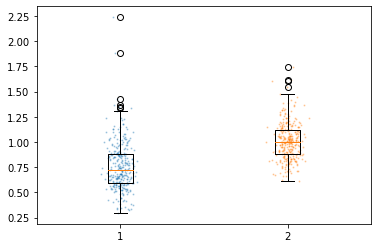

In [31]:
# For Pol2S5

g1 = out_df_dict['T2p1']['normalized_inc_Pol2S5']
g2 = out_df_dict['T2p1']['normalized_subset_control_Pol2S5']
#g3 = out_df_dict['HDACi']['normalized_inc_Pol2S5']
#g4 = out_df_dict['HDACi']['normalized_subset_control_Pol2S5']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)
boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 3.911532891281473e-15


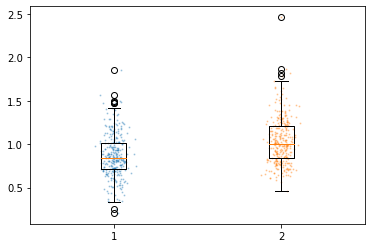

In [34]:
# For Pol2S5 norm to dna

g1 = (out_df_dict['T2p1']['normalized_inc_Pol2S5'])/(out_df_dict['T2p1']['normalized_inc_dna'])
g2 = (out_df_dict['T2p1']['normalized_subset_control_Pol2S5'])/(out_df_dict['T2p1']['normalized_subset_control_dna'])
#g3 = out_df_dict['HDACi']['normalized_inc_Pol2S5']/(out_df_dict['HDACi']['normalized_inc_dna'])
#g4 = out_df_dict['HDACi']['normalized_subset_control_Pol2S5']/(out_df_dict['HDACi']['normalized_subset_control_dna'])

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)

boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.277558056011215e-06


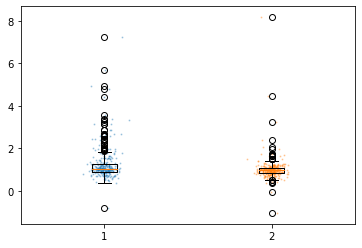

In [35]:
# For H2ax-key relevant Ab


g1 = (out_df_dict['T2p1'][f'normalized_inc_{actual_h2ax_key}'])
g2 = (out_df_dict['T2p1'][f'normalized_subset_control_{actual_h2ax_key}'])
#g3 = out_df_dict['HDACi'][f'normalized_inc_{actual_h2ax_key}']
#g4 = out_df_dict['HDACi'][f'normalized_subset_control_{actual_h2ax_key}']

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)

boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

MW comparision: 1.2418005828227849e-17


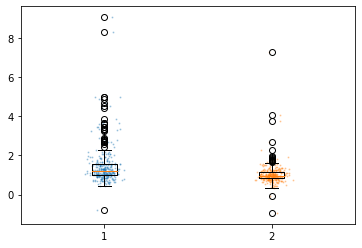

In [36]:
# For H2ax-key relevant Ab


g1 = (out_df_dict['T2p1'][f'normalized_inc_{actual_h2ax_key}'])/(out_df_dict['T2p1']['normalized_inc_dna'])
g2 = (out_df_dict['T2p1'][f'normalized_subset_control_{actual_h2ax_key}'])/(out_df_dict['T2p1']['normalized_subset_control_dna'])
#g3 = out_df_dict['HDACi'][f'normalized_inc_{actual_h2ax_key}']/(out_df_dict['HDACi']['normalized_inc_dna'])
#g4 = out_df_dict['HDACi'][f'normalized_subset_control_{actual_h2ax_key}']/(out_df_dict['HDACi']['normalized_subset_control_dna'])

#sp_low = min(len(g1),len(g2),len(g3))
#sp_low = min(len(g1),len(g2), len(g3))

#g1 = np.random.choice(g1, sp_low)
#g2 = np.random.choice(g2, sp_low)
#g3 = np.random.choice(g3, sp_low)
#g4 = np.random.choice(g4, sp_low)
#args = (g1,g2,g3,g4)
args = (g1,g2)

boxplot_pol2= plt.boxplot([*args], meanline = True)


vals, xs = [], [] 

for i, subdf in enumerate([*args]):
    #names.append(name)
    vals.append(subdf.tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 1, alpha=0.3)

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
#p4 = kruskal(g1,g2,g3,g4)

U1, p1 = mannwhitneyu(g1,g2)

print(f"MW comparision: {p1}")



#print(f"three samples comparision: {p4}")

In [26]:
from scipy import stats
stats.spearmanr(out_df_dict['Asy']['normalized_inc_Pol2S5'], out_df_dict['Asy'][f'normalized_inc_{actual_h2ax_key}'])

SpearmanrResult(correlation=0.8117113195418125, pvalue=1.2950853356059274e-40)

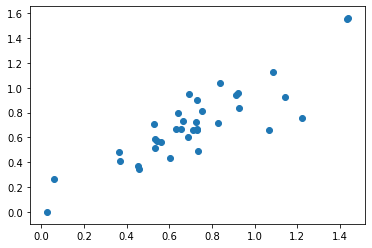

In [42]:
plt.scatter(x= out_df_dict['Asy']['normalized_inc_Pol2S5'], y =out_df_dict['Asy'][f'normalized_inc_{actual_h2ax_key}'])


In [43]:
plt.scatter(x= out_df_dict['HDACi']['normalized_inc_Pol2S5'], y =out_df_dict['HDACi'][f'normalized_inc_{actual_h2ax_key}'])


KeyError: 'HDACi'